# Stock Market Analysis

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. 

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

/Users/riccardo/Documents/personal/Stock-market-analysis/env/lib/python3.4/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now()

In [4]:
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [6]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-20,114.080002,114.349998,111.629997,112.650002,68501600,110.291855
2015-08-21,110.430000,111.900002,105.650002,105.760002,128275500,103.546087
2015-08-24,94.870003,108.800003,92.000000,103.120003,162206300,100.961352
2015-08-25,111.110001,111.110001,103.500000,103.739998,103601600,101.568368
2015-08-26,107.089996,109.889999,105.050003,109.690002,96774600,107.393819


In [7]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,105.071700,106.101462,104.026205,105.087312,4.441946e+07,103.723719
std,8.268430,8.294074,8.178415,8.231259,2.004612e+07,7.748142
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.220001,98.209999,96.430000,97.139999,3.132680e+07,96.348065
50%,105.580002,106.480003,104.879997,105.790001,3.918030e+07,104.474507
75%,111.620003,112.389999,110.040001,111.730003,5.216150e+07,109.518392
max,123.129997,123.820000,121.620003,122.570000,1.622063e+08,120.004194


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-08-20 to 2016-08-19
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


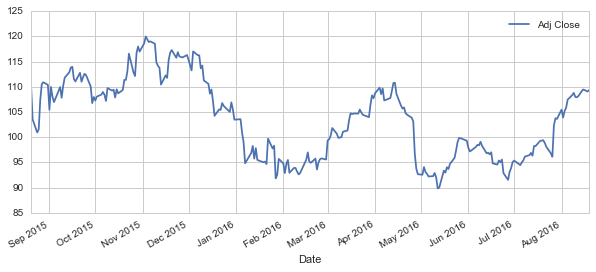

In [9]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

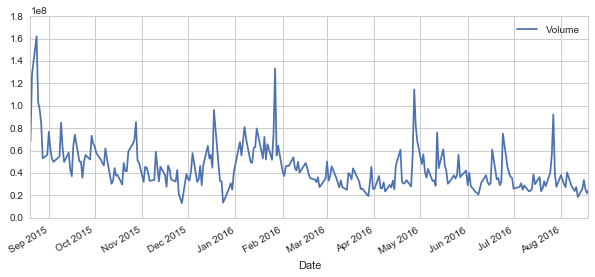

In [10]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for {} days".format(ma)
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

/Users/riccardo/Documents/personal/Stock-market-analysis/env/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/Users/riccardo/Documents/personal/Stock-market-analysis/env/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/Users/riccardo/Documents/personal/Stock-market-analysis/env/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


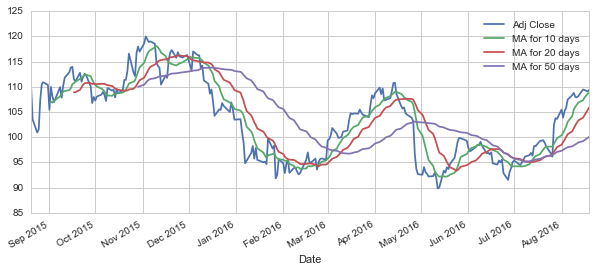

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

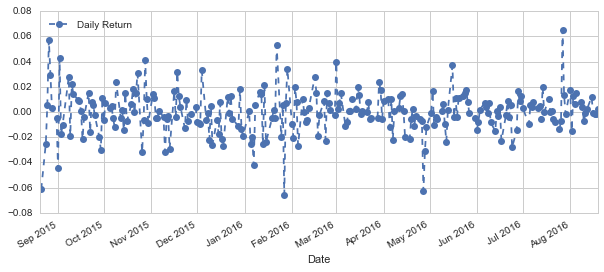

In [14]:
AAPL['Daily Return'].plot(legend=True, figsize=(10,4), linestyle='--', marker='o')

/Users/riccardo/Documents/personal/Stock-market-analysis/env/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


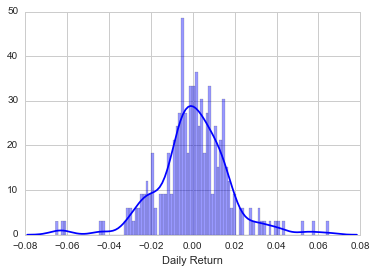

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='blue')

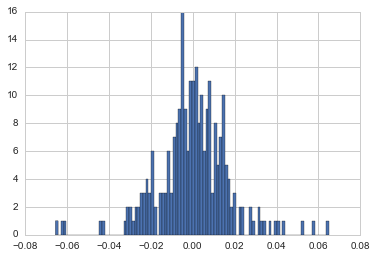

In [16]:
AAPL['Daily Return'].hist(bins=100)

In [17]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [18]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-20,110.291855,515.780029,646.830017,44.441217
2015-08-21,103.546087,494.470001,612.479980,41.920351
2015-08-24,100.961352,463.369995,589.609985,40.567454
2015-08-25,101.568368,466.369995,582.059998,39.389753
2015-08-26,107.393819,500.769989,628.619995,41.569959


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-20,NaN,NaN,NaN,NaN
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273
2015-08-25,0.006012,0.006474,-0.012805,-0.029031
2015-08-26,0.057355,0.073761,0.079992,0.055350


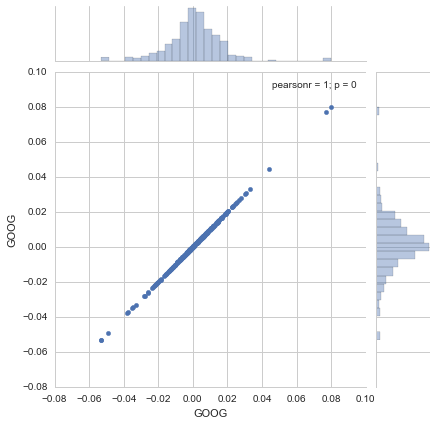

In [21]:
sns.jointplot('GOOG', 'GOOG',tech_rets)

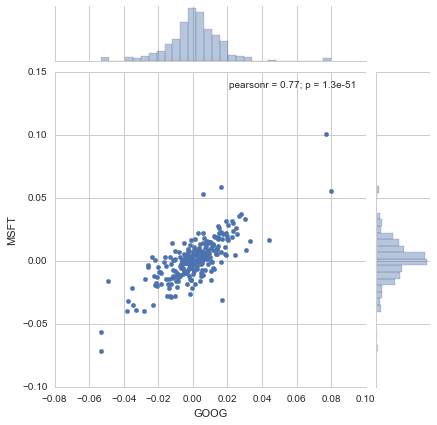

In [22]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

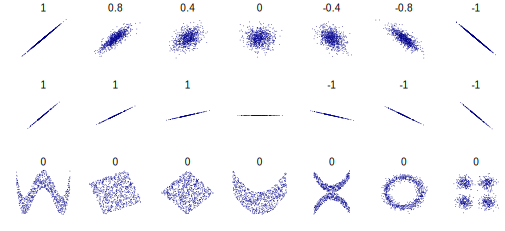

In [23]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

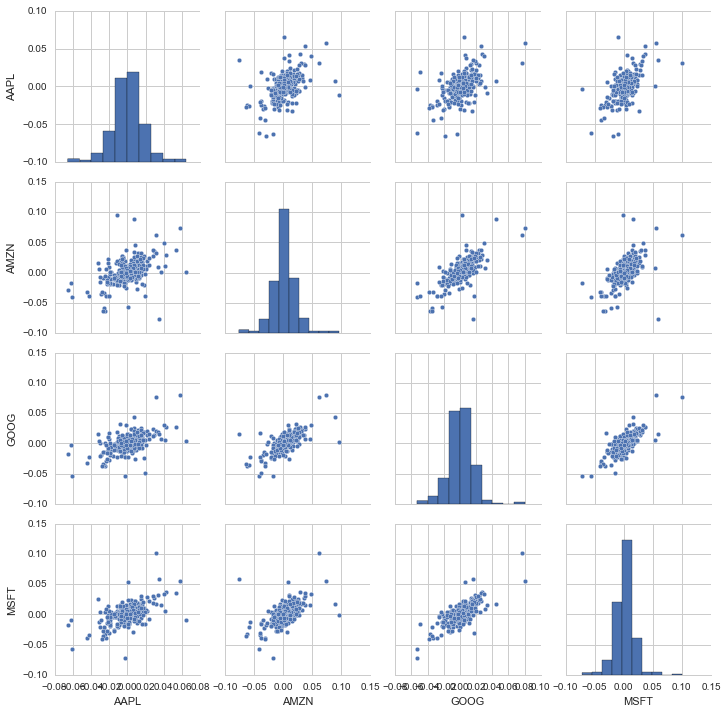

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

In [25]:
tech_rets.dropna().head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273
2015-08-25,0.006012,0.006474,-0.012805,-0.029031
2015-08-26,0.057355,0.073761,0.079992,0.055350
2015-08-27,0.029447,0.035146,0.014301,0.027862


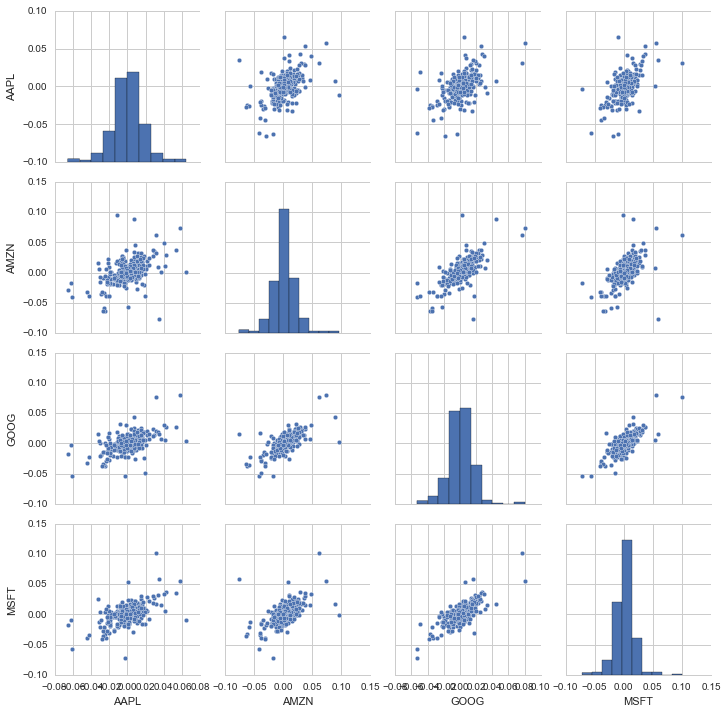

In [26]:
sns.pairplot(tech_rets.dropna())

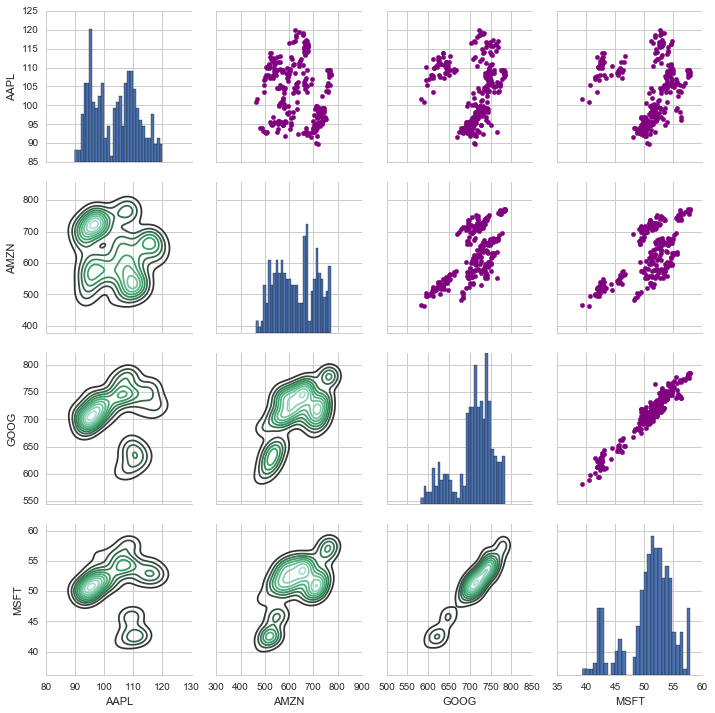

In [27]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, color='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

In [28]:
# TODO : use sns.heatmap instead of sns.corrplot(tech_rets, annot=True)

In [29]:
techs = tech_rets.dropna()

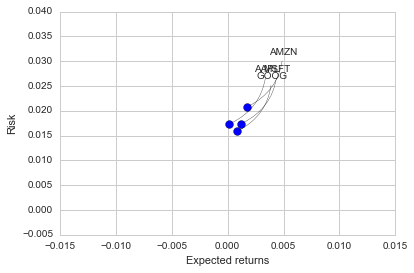

In [32]:
area = np.pi * 20

plt.scatter(techs.mean(), techs.std(), s=area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(techs.columns, techs.mean(), techs.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

/Users/riccardo/Documents/personal/Stock-market-analysis/env/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


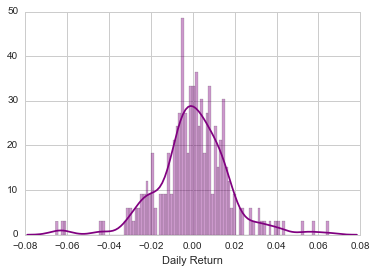

In [33]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [35]:
# The 0.05 empirical quantile of daily returns
techs['AAPL'].quantile(0.05)

-0.026174612362682335

The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

## Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt‾‾‾√
ΔSS=μΔt+σϵΔt

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt‾‾‾√)
ΔS=S(μΔt+σϵΔt)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [41]:
days = 365

dt = 1/days

mu = techs.mean()['GOOG']

sigma = techs.std()['GOOG']

In [45]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

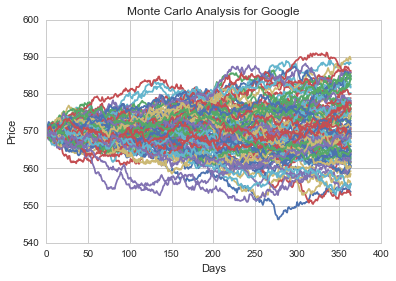

In [46]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [48]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

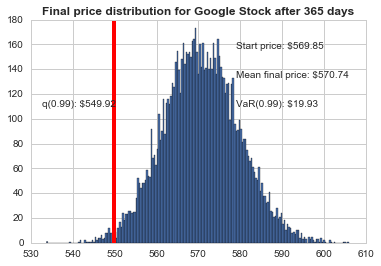

In [49]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');